## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
test_df = pd.merge(mouse_data, study_results,how='left', on='Mouse ID')

test_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mouse_count = pd.DataFrame(test_df['Mouse ID'].unique())
mouse_count.count()

0    249
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = test_df.groupby(['Mouse ID','Timepoint'])
dups = pd.DataFrame(dups['Tumor Volume (mm3)'].count())
dups.loc[dups['Tumor Volume (mm3)'] >1]

Tumor Volume (mm3)
Mouse ID Timepoint                    
g989     0                           2
         5                           2
         10                          2
         15                          2
         20                          2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
trials = test_df.loc[test_df['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = pd.DataFrame(trials['Mouse ID'].unique())
mouse_count.count()

0    248
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = trials.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = trials.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = trials.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = trials.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = trials.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({'Mean' : mean,
                              'Median' : median,
                              'Variance' : variance,
                              'Standard Deviation' : stdev,
                              'SEM' : sem})

summary_stats['Mean'] = summary_stats['Mean'].map('{:.2f}'.format)
summary_stats['Median'] = summary_stats['Median'].map('{:.2f}'.format)
summary_stats['Variance'] = summary_stats['Variance'].map('{:.2f}'.format)
summary_stats['Standard Deviation'] = summary_stats['Standard Deviation'].map('{:.2f}'.format)
summary_stats['SEM'] = summary_stats['SEM'].map('{:.2f}'.format)

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

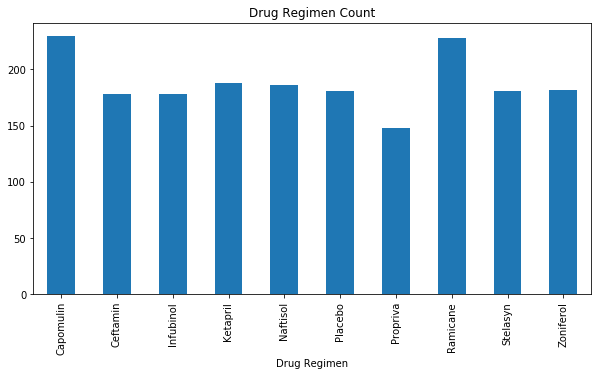

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar = trials.groupby('Drug Regimen')['Mouse ID'].count()

bar.plot(kind="bar", figsize=(10,5), title = "Drug Regimen Count")

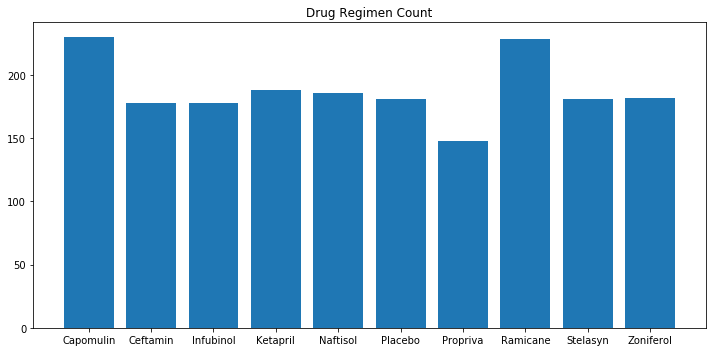

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
bar2 = trials.groupby('Drug Regimen')['Mouse ID'].count()
bar2 = pd.DataFrame(bar2)

x_axis = bar2.index.tolist()
y_axis = bar2['Mouse ID'].tolist()

plt.figure(figsize=(10,5))

plt.bar(x_axis, y_axis,align="center")

plt.title('Drug Regimen Count')
plt.tight_layout()

## Pie Plots

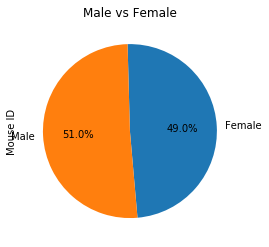

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie = trials.groupby('Sex')['Mouse ID'].count()
pie = pie.reset_index()

pie.plot(kind='pie', y = 'Mouse ID',autopct='%1.1f%%', startangle=275,labels=pie['Sex'], legend = False, title = 'Male vs Female')

Text(0.5, 1.0, 'Male vs Female')

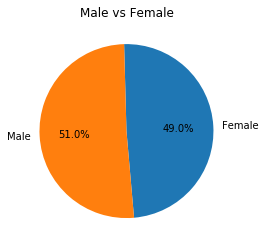

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2 = trials.groupby('Sex')['Mouse ID'].count()
pie2 = pd.DataFrame(pie2)

count = pie2['Mouse ID'].tolist()
labels = ['Female', 'Male']

plt.pie(count,labels=labels, autopct="%1.1f%%", startangle=275)
plt.title('Male vs Female')

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

scatter = trials.groupby('Drug Regimen')['Tumor Volume (mm3)'].min()
scatter = pd.DataFrame(scatter)
scatter.sort_values(['Tumor Volume (mm3)'], ascending=True).head(4)

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,22.050126
Capomulin,23.343598
Infubinol,36.321346
Ceftamin,45.000000


In [13]:
ramicane = trials.loc[(trials['Drug Regimen'] == 'Ramicane') & (trials['Timepoint'] == 45)].reset_index()

ramicane2 = ramicane['Tumor Volume (mm3)']

quartiles = ramicane2.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Ramicane tumor size is: {lowerq}")
print(f"The upper quartile of Ramicane tumor size is: {upperq}")
print(f"The interquartile range of Ramicane tumor size is: {iqr}")
print(f"The the median of Ramicane tumor size is: {quartiles[0.5]:.2f} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumor size is: 30.98
The upper quartile of Ramicane tumor size is: 38.51
The interquartile range of Ramicane tumor size is: 7.53
The the median of Ramicane tumor size is: 34.85 
Values below 19.69 could be outliers.
Values above 49.8 could be outliers.


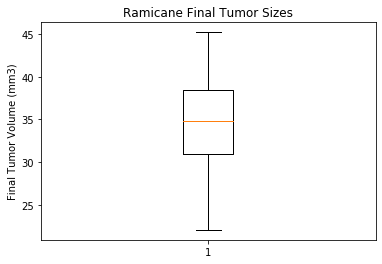

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
count_ramicane = ramicane['Tumor Volume (mm3)'].tolist()
fig, ax = plt.subplots()
ax.set_title('Ramicane Final Tumor Sizes')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(count_ramicane)
plt.show()

In [15]:
capomulin = trials.loc[(trials['Drug Regimen'] == 'Capomulin') & (trials['Timepoint'] == 45)].reset_index()
capomulin2 = capomulin['Tumor Volume (mm3)']

quartiles = capomulin2.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Capomulin tumor size is: {lowerq}")
print(f"The upper quartile of Capomulin tumor size is: {upperq}")
print(f"The interquartile range of Capomulin tumor size is: {iqr}")
print(f"The the median of Capomulin tumor size is: {quartiles[0.5]:.2f} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumor size is: 32.38
The upper quartile of Capomulin tumor size is: 40.16
The interquartile range of Capomulin tumor size is: 7.78
The the median of Capomulin tumor size is: 37.31 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


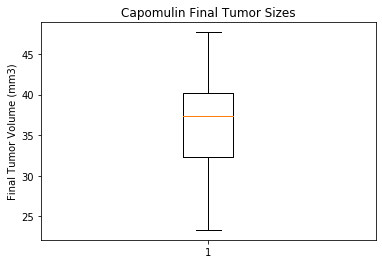

In [16]:
count_capomulin = capomulin['Tumor Volume (mm3)'].tolist()
fig, ax = plt.subplots()
ax.set_title('Capomulin Final Tumor Sizes')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(count_capomulin)
plt.show()

In [17]:
infubinol = trials.loc[(trials['Drug Regimen'] == 'Infubinol') & (trials['Timepoint'] == 45)].reset_index()
infubinol2 = infubinol['Tumor Volume (mm3)']

quartiles = infubinol2.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Infubinol tumor size is: {lowerq}")
print(f"The upper quartile of Infubinol tumor size is: {upperq}")
print(f"The interquartile range of Infubinol tumor size is: {iqr}")
print(f"The the median of Infubinol tumor size is: {quartiles[0.5]:.2f} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumor size is: 62.75
The upper quartile of Infubinol tumor size is: 67.69
The interquartile range of Infubinol tumor size is: 4.94
The the median of Infubinol tumor size is: 66.08 
Values below 55.34 could be outliers.
Values above 75.1 could be outliers.


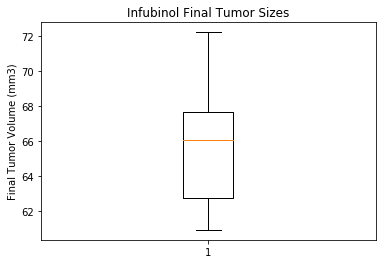

In [18]:
count_infubinol = infubinol['Tumor Volume (mm3)'].tolist()
fig, ax = plt.subplots()
ax.set_title('Infubinol Final Tumor Sizes')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(count_infubinol)
plt.show()

In [19]:
ceftamin = trials.loc[(trials['Drug Regimen'] == 'Ceftamin') & (trials['Timepoint'] == 45)].reset_index()
ceftamin2 = ceftamin['Tumor Volume (mm3)']

quartiles = ceftamin2.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Ceftamin tumor size is: {lowerq}")
print(f"The upper quartile of Ceftamin tumor size is: {upperq}")
print(f"The interquartile range of Ceftamin tumor size is: {iqr}")
print(f"The the median of Ceftamin tumor size is: {quartiles[0.5]:.2f} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumor size is: 61.43
The upper quartile of Ceftamin tumor size is: 67.53
The interquartile range of Ceftamin tumor size is: 6.1
The the median of Ceftamin tumor size is: 64.30 
Values below 52.28 could be outliers.
Values above 76.68 could be outliers.


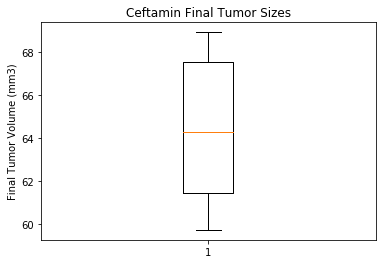

In [20]:
count_ceftamin = ceftamin['Tumor Volume (mm3)'].tolist()
fig, ax = plt.subplots()
ax.set_title('Ceftamin Final Tumor Sizes')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(count_ceftamin)
plt.show()

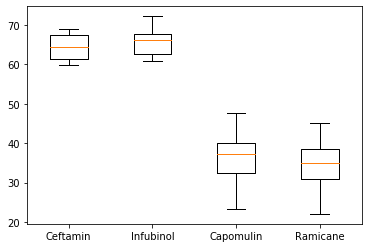

In [21]:
data = [count_ceftamin,count_infubinol,count_capomulin,count_ramicane]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Ceftamin', 'Infubinol', 'Capomulin', 'Ramicane'])
plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lineplot = trials.loc[trials['Drug Regimen'] == 'Capomulin'].reset_index()
lineplot['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

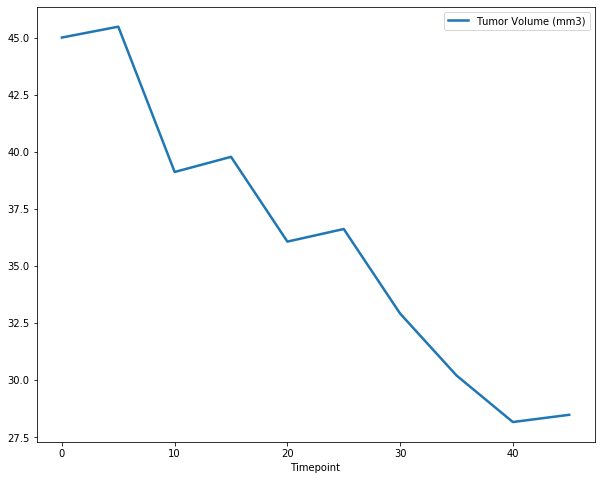

In [23]:
x401 = lineplot.loc[lineplot['Mouse ID'] == 'x401']
x401 = x401[['Timepoint','Tumor Volume (mm3)']].reset_index(drop=True)
x401 = x401.set_index('Timepoint')
x401 = x401.plot(figsize=(10, 8), linewidth=2.5)

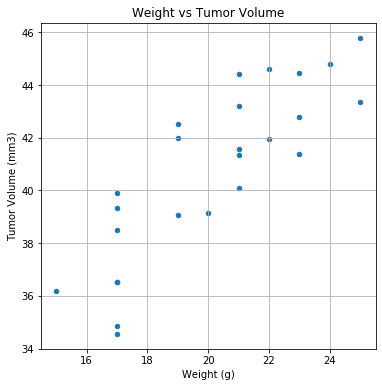

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter = trials.loc[trials['Drug Regimen'] == 'Capomulin']
scatter = pd.DataFrame(scatter.groupby(["Mouse ID"]).mean())
scatter = scatter[['Weight (g)','Tumor Volume (mm3)']]

scatter.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid=True, figsize=(6,6),title='Weight vs Tumor Volume')
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = scatter.loc[:,'Weight (g)']
tumor_volume = scatter.loc[:,'Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


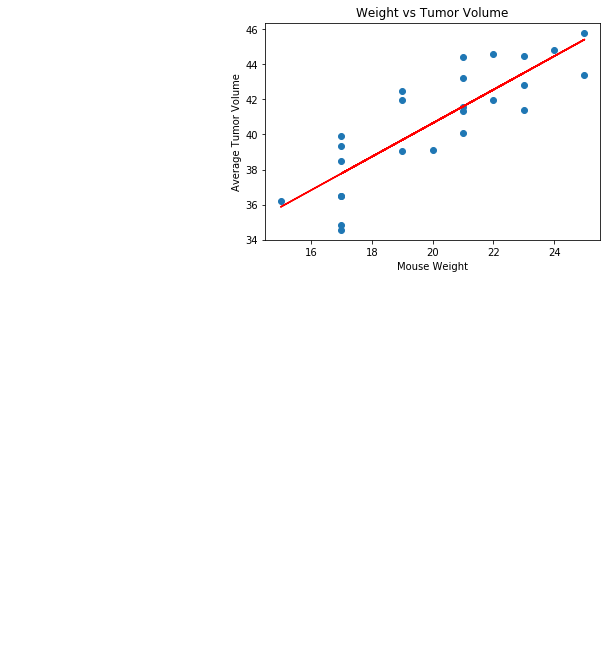

In [26]:
x_values = scatter['Weight (g)']
y_values = scatter['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Weight vs Tumor Volume')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()